<a href="https://colab.research.google.com/github/Lucas-hearc/KeywordSpotting/blob/main/RCNN_KWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install librosa
!pip install numpy
!pip install matplotlib
!pip install tensorflow

In [ ]:
import os
import zipfile
from google.colab import drive
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import tensorflow

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive')
os.chdir('/content/drive/My Drive/DATA')
os.chdir('/content/drive/My Drive/DATA/training/au_secours')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
audio_file = '/content/drive/MyDrive/DATA/training/au_secours/au secour.3rv6kt9k.ingestion-5877979785-4ctzf.s43.wav'
ipd.Audio(audio_file)


ValueError: ignored

In [ ]:
import os
import zipfile
from google.colab import drive
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import tensorflow

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive')
os.chdir('/content/drive/My Drive/DATA')
os.chdir('/content/drive/My Drive/DATA/training/au_secours')

# Paramètres MFCC
nmfcc = 13
hop_length = 512

# Liste pour stocker les MFCC de tous les fichiers audio
mfccs = []
i = 0
label_0 = []
label_1 = []
label = []
# Parcourir tous les fichiers audio du dossier
for filename in os.listdir(os.curdir):

    if filename.endswith('.wav'):

        label_1.append(1)
        # Charger le fichier audio
        audio_path = os.path.join(os.curdir, filename)
        audio, sr = librosa.load(audio_path)
        # Extraire les MFCC
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=nmfcc, hop_length=hop_length)
        # Ajouter les MFCC à la liste
        mfccs.append(mfcc)

os.chdir('/content/drive/My Drive/DATA/training/noise')
for filename in os.listdir(os.curdir):

    if filename.endswith('.wav'):

        label_0.append(0)
        # Charger le fichier audio
        audio_path = os.path.join(os.curdir, filename)
        audio, sr = librosa.load(audio_path)
        # Extraire les MFCC
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=nmfcc, hop_length=hop_length)
        # Ajouter les MFCC à la liste
        mfccs.append(mfcc)
# Convertir la liste en tableau Numpy
label = label_1 + label_0

mfccs = np.asarray(mfccs)
label = np.asarray(label)

model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(13,44,1)),
    tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tensorflow.keras.layers.Flatten(),
    tensorflow.keras.layers.Dense(units=128, activation='relu'),
    tensorflow.keras.layers.Dense(units=1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(mfccs, label, epochs=10, batch_size=32)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/10
44/44 [==============================] - 2s 21ms/step - loss: 1.3828 - accuracy: 0.9199
Epoch 2/10
44/44 [==============================] - 1s 28ms/step - loss: 0.0574 - accuracy: 0.9907
Epoch 3/10
44/44 [==============================] - 2s 35ms/step - loss: 0.0042 - accuracy: 0.9986
Epoch 4/10
44/44 [==============================] - 1s 34ms/step - loss: 0.0072 - accuracy: 0.9971
Epoch 5/10
44/44 [==============================] - 1s 33ms/step - loss: 0.0158 - accuracy: 0.9943
Epoch 6/10
44/44 [==============================] - 1s 21ms/step - loss: 8.1264e-04 - accuracy: 0.9993
Epoch 7/10
44/44 [==============================] - 1s 20ms/step - loss: 2.3360e-05 - accuracy: 1.0000
Epoch 8/10
44/44 [==============================] - 1s 21ms/step - loss: 1.3904e-05 - accuracy: 1.0000
Epoch 9/10
44/44 [==============================] - 2s 35ms/step - 

In [ ]:
mfccs = np.asarray(mfccs)
label = np.asarray(label)
print(mfccs.shape)
print(label.shape)

(1398, 13, 44)
(1398,)


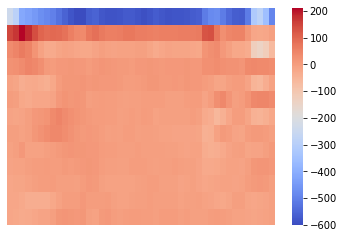

In [ ]:
seaborn.heatmap(data=mfccs[0], cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.show()

In [ ]:
model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(13,44,1)),
    tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tensorflow.keras.layers.Flatten(),
    tensorflow.keras.layers.Dense(units=128, activation='relu'),
    tensorflow.keras.layers.Dense(units=1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(mfccs, label, epochs=10, batch_size=32)

Epoch 1/10
44/44 [==============================] - 2s 21ms/step - loss: 1.5205 - accuracy: 0.9235
Epoch 2/10
44/44 [==============================] - 1s 21ms/step - loss: 0.0324 - accuracy: 0.9943
Epoch 3/10
44/44 [==============================] - 1s 25ms/step - loss: 0.0085 - accuracy: 0.9971
Epoch 4/10
44/44 [==============================] - 1s 32ms/step - loss: 0.0097 - accuracy: 0.9971
Epoch 5/10
44/44 [==============================] - 1s 22ms/step - loss: 0.0022 - accuracy: 0.9993
Epoch 6/10
44/44 [==============================] - 1s 21ms/step - loss: 5.1763e-04 - accuracy: 1.0000
Epoch 7/10
44/44 [==============================] - 1s 20ms/step - loss: 1.8047e-04 - accuracy: 1.0000
Epoch 8/10
44/44 [==============================] - 1s 20ms/step - loss: 1.1977e-04 - accuracy: 1.0000
Epoch 9/10
44/44 [==============================] - 1s 20ms/step - loss: 9.5970e-05 - accuracy: 1.0000
Epoch 10/10
44/44 [==============================] - 1s 29ms/step - loss: 8.3491e-05 - accura

In [ ]:
model.save('kws_model2.h5')

1/1 [==============================] - 0s 62ms/step
(13, 44)
prediction bon : [[0.00098328]]


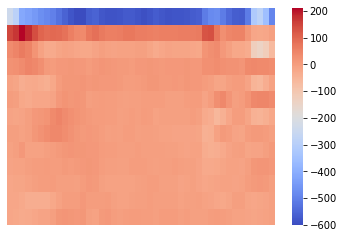

prediction mauvais : [[0.41183206]]


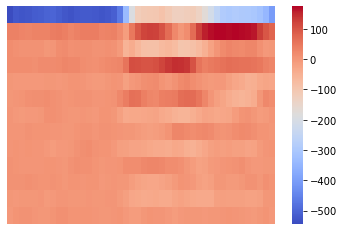

In [ ]:
model = tensorflow.keras.models.load_model('kws_model2.h5')

# Charger le fichier audio
audio_file_bon = '/content/drive/MyDrive/DATA/testing/au_secours_test.wav'
audio_file_mauvais ='/content/drive/MyDrive/DATA/testing/unknown.1ed0b13d_nohash_1.wav.3rugckda.ingestion-5877979785-4ctzf.wav'
samples1, sample_rate1 = librosa.load(audio_file_bon)
samples2, sample_rate2 = librosa.load(audio_file_mauvais)

# Extraire les caractéristiques MFCC
mfccs_bon = librosa.feature.mfcc(y=samples1, sr=22050, n_mfcc=13)
mfccs_mauvais = librosa.feature.mfcc(y=samples2, sr=22050, n_mfcc=13)


mfccs_bon_reshaped = np.reshape(mfccs_bon, (13, 44, 1))
mfccs_mauvais_reshaped = np.reshape(mfccs_mauvais, (13, 44, 1))


# Prédire le mot-clé
prediction_bon = model.predict(np.array([mfccs_bon_reshaped]))
prediction_mauvais = model.predict(np.array([mfccs_mauvais_reshaped]))

mfccs_plot =np.squeeze(np.array([mfccs_bon_reshaped]))
print(mfccs_plot.shape)


seaborn.heatmap(data=mfccs_plot, cmap='coolwarm', xticklabels=False, yticklabels=False)
print(f"prediction bon : {prediction_bon}")
plt.show()
seaborn.heatmap(data=mfccs_mauvais, cmap='coolwarm', xticklabels=False, yticklabels=False)
print(f"prediction mauvais : {prediction_mauvais}")
